# Laboratorio 3

Luis Pedro Pérez 22008067

## Parte 1: Numpy

1) ¿Cuál es el tamaño en bytes de un array de 1000 elementos de tipo booleano?

In [23]:
import numpy as np
import sys
#Se realiza un array tipo booleano de tamaño 1000
x=np.ones(1000, dtype=bool)
#Se extrae el tamaño del mismo en bytes
sys.getsizeof(x)

1112

2. Cree un array cuyos elementos sean los enteros pares en
[1,100] y en orden decreciente. Muestre los 10 últimos
por pantalla.

In [24]:
import numpy as np
#Se realiza el arrange de numeros enteros pares de 1 a 100 con la función np.arange. Seguido, se le invierte con la función np.flip
x= np.flip(np.arange(2,101,2))
#Se muestran los últimos 10
print(x[-10:])

[20 18 16 14 12 10  8  6  4  2]


3) Dado el array
2 4 5 6
0 3 7 4
8 8 5 2
1 5 6 1
Seleccione con una instrucción el subarray de elementos
0 3 7 4
Después, seleccione el subarray de elementos
2 5
8 5

In [25]:
#Se crea el arrange
x=[[2,4,5,6],[0,3,7,4],[8,8,5,2],[1,5,6,1]]
#Se extrae el elemento 1 del arrange
subarray=x[1]
print(subarray)
#Se extraen los valores especificados.
subarray2 =     [[x[0][0],x[0][2]]],[x[2][0],x[2][2]]
print(subarray2)

[0, 3, 7, 4]
([[2, 5]], [8, 5])


3. Dados los arrays a = [1, 4, 2, 7] y b = [1, 3, 2, 9],
obtenga la media aritmética de la diferencia (a-b).

In [2]:
import numpy as np

a = np.array([1, 4, 2, 7])
b = np.array([1, 3, 2, 9])

dif = a - b
media = np.mean(dif)

print(f"La media aritmética de la diferencia entre a y b es: {media}")

La media aritmética de la diferencia entre a y b es: -0.25


5. Tengo valores de cordenadas (x, y) en las columnas
del array
1.33 4.5
30.0 10.7
70.2 0.5
Agregue a este array las coordenadas (37.1, -3.6). Muestre en pantalla las dimensiones del nuevo
array.

In [9]:
#Se llama Numpy
import numpy as np
#Se crea el array x con la función np.array
x = np.array([[1.33, 4.5], [30, 10.7],[70.2,0.5]])
#Debido a que se anexan las coordinadas verticales, se utiliza la función np.vstack
x=np.vstack([x,[37.1,-3.6]])
print(f"Las dimensiones del array resultante son: {x.shape}")

Las dimensiones del array resultante son: (4, 2)


6) Copie el array del ejercicio anterior. Traspóngalo (.
Agregue ahora dos nuevos pares de coordenadas: (10.8,
3.0) y (35.8, 12.0).

In [14]:
#Se llama Numpy
import numpy as np
#Se crea el array x con la función np.array
coord = np.array([[1.33, 4.5], [30, 10.7],[70.2,0.5]])
#Debido a que se anexan las coordinadas verticales, se utiliza la función np.vstack
coord=np.vstack([coord,[37.1,-3.6]])
coord= coord.transpose()
coord2 = np.array([[10.8, 3],[35.8,12]])
coord2=coord2.transpose()
coord=np.hstack([coord, coord2])
print(coord)


[[ 1.33 30.   70.2  37.1  10.8  35.8 ]
 [ 4.5  10.7   0.5  -3.6   3.   12.  ]]


## Parte 2: Exploración y Minería de Datos

1) ¿Cuántos Municipios tienen más de 100000 habitantes?.

In [2]:
import pandas as pd
import matplotlib.pylab as plt

dataset = pd.read_csv("Lab_3/Lab_3/NucleosPoblacion.csv")
df=pd.DataFrame(dataset)
df.head()
#Se validan los tipos de las columnas
df.dtypes
df_2 = df.loc[df["Poblacion"]>100000]
muni= len(df_2)
print(f"El total de municipios son: {muni}")

El total de municipios son: 62


2) Realice una gráfica de barras sobre la población de cada
ciudad, ordenela de menor a mayor y responda:
a. ¿Cuál es la segunda ciudad más poblada?
b. ¿Qué posición ocupa Granada en el ranking de
las ciudades más pobladas?

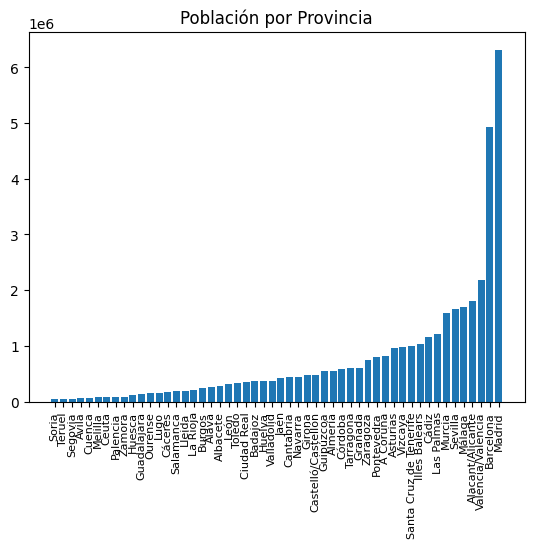

            Provincia  Poblacion
31             Málaga  1702839.0
15   Alacant/Alicante  1804252.0
40  València/Valencia  2189461.0
47          Barcelona  4934795.0
30             Madrid  6315312.0

   Provincia  Poblacion
24   Granada   604357.0


In [84]:
#Se ordena el dataset de manera descendiente por el campo de Población
pos_ord = df.groupby(by='Provincia', sort=False, as_index=False)['Poblacion'].sum()
pos_ord=pd.DataFrame(pos_ord.sort_values("Poblacion"))

#Se genera la gráfica de barras

plt.bar(pos_ord["Provincia"], pos_ord["Poblacion"], align="center")
#Se generan las etiquetas del gráfico
plt.title("Población por Provincia")

#Se rotan los nombres
plt.xticks(rotation=90, fontsize=8)
#plt.figure(figsize=(20,3))
plt.show()
df_cit = pd.DataFrame(pos_ord, columns=["Provincia", "Poblacion"])
#print(df_cit.iloc[-4:])
print(df_cit.tail())
print("")
#Para facilitar la localización de Granada, se utiliza:
print(pos_ord.loc[pos_ord["Provincia"]=="Granada"])


3) ¿Cuántos municipios de Málaga tienen más de 50000
habitantes?.

In [24]:
df_malaga = df.loc[(df["Poblacion"]>50000) & (df["Provincia"]=="Málaga")]
print(f"El total de municipios en la provincia de Málaga que tienen más de 50,000 habitantes es: {len(df_malaga)}")

El total de municipios en la provincia de Málaga que tienen más de 50,000 habitantes es: 9


4) ¿Cuál es el municipio situado más al Norte? (Usar el
valor de la coordenada "Y" que representa la latitud en
grados). Proporcione también la provincia a la que
pertenece y su población.

In [9]:
mun_nor = df.groupby(by=['Provincia','Municipio'], sort=False, as_index=False).aggregate({'Poblacion': 'sum','Y':'max'})
mun_nor=pd.DataFrame(mun_nor.sort_values('Y', ascending=False))
print(mun_nor.head())

    Provincia   Municipio  Poblacion          Y
104      Lugo     Viveiro    16211.0  43.625578
447  Asturias       Gozón    10788.0  43.614030
443  Asturias     Carreño    11000.0  43.590199
444  Asturias  Castrillón    22832.0  43.559984
442  Asturias      Avilés    84202.0  43.558577


5) Obtenga la media, mediana, desviación estándar, valor
máximo y valor mínimo de la población de los municipios
de la provincia de Granada.

In [16]:
df_gra = df[df['Provincia']=='Granada']
print("Las estadísticas descriptivas de Granada son:")
print(df_gra["Poblacion"].describe())

Las estadísticas descriptivas de Granada son:
count        20.000000
mean      30217.850000
std       50355.491715
min       10386.000000
25%       13146.500000
50%       17526.000000
75%       21739.750000
max      239154.000000
Name: Poblacion, dtype: float64


6) Realice un histograma con la población de los
Municipios para cada una de las provincias.

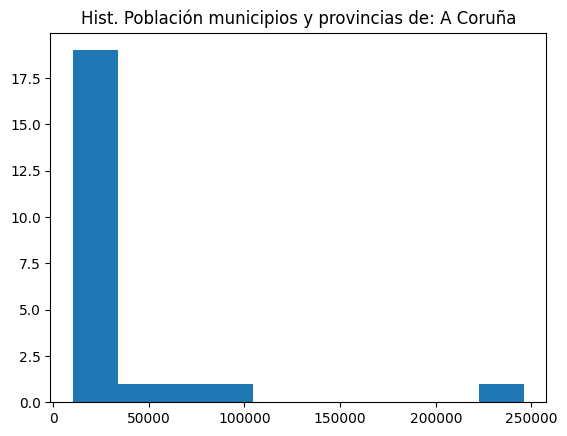

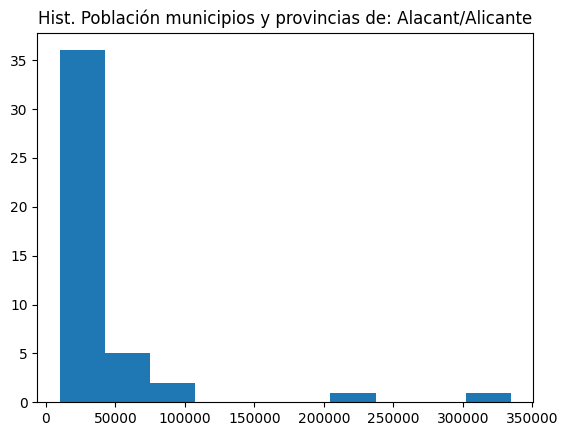

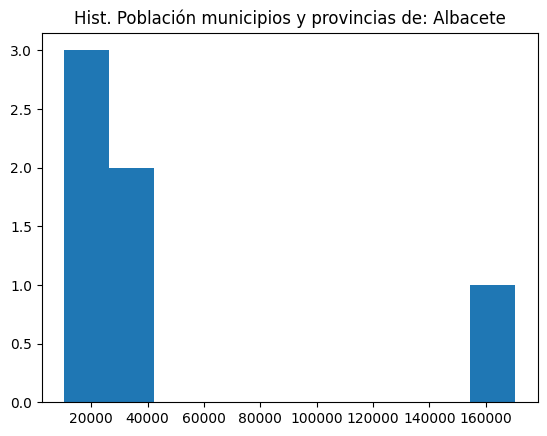

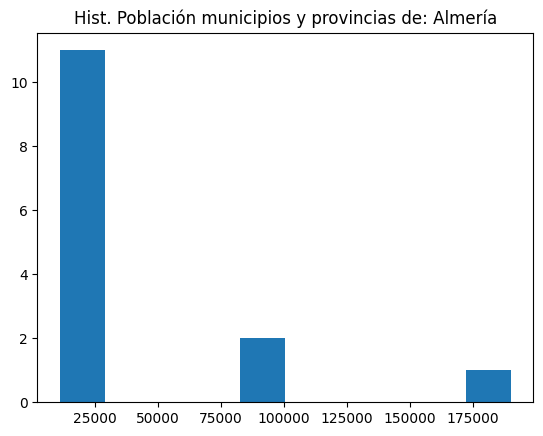

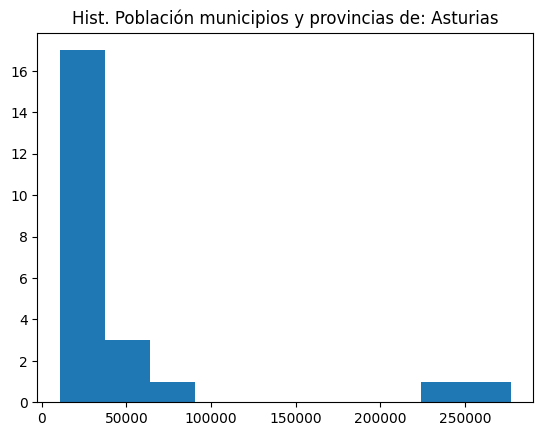

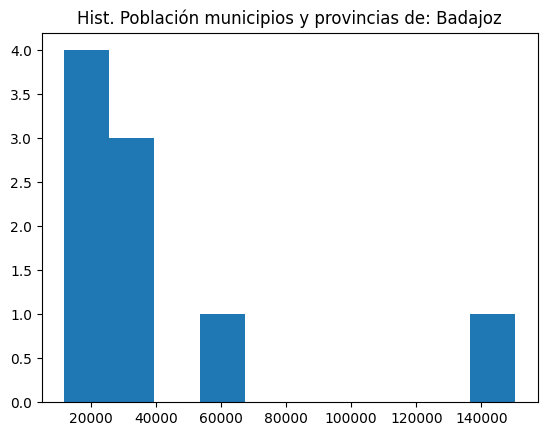

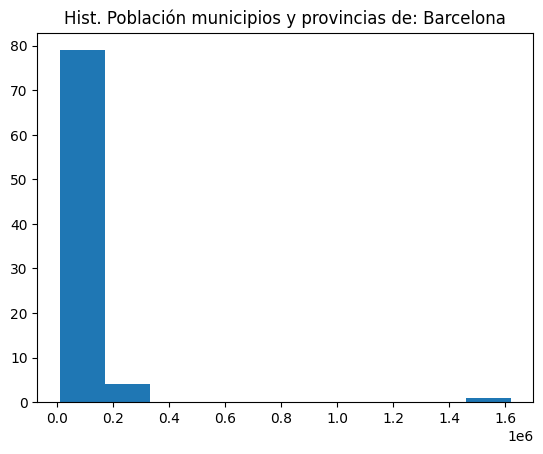

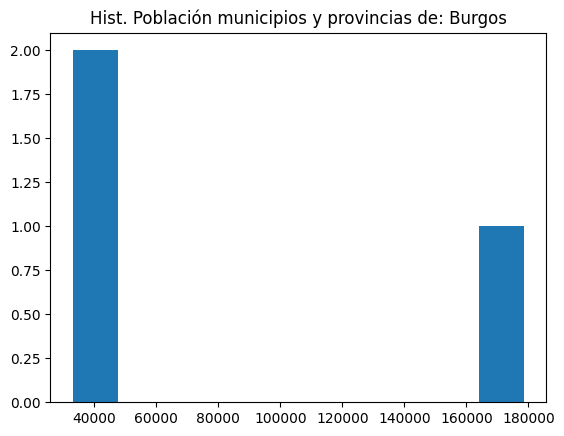

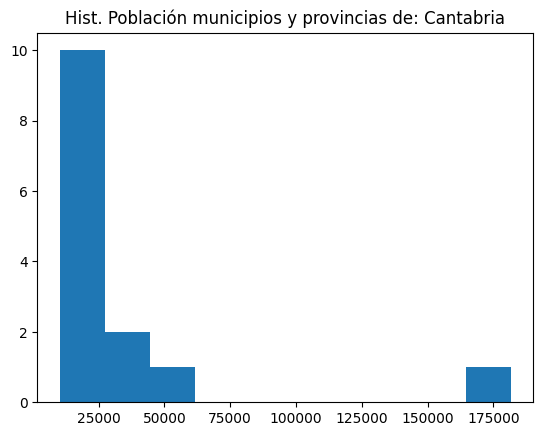

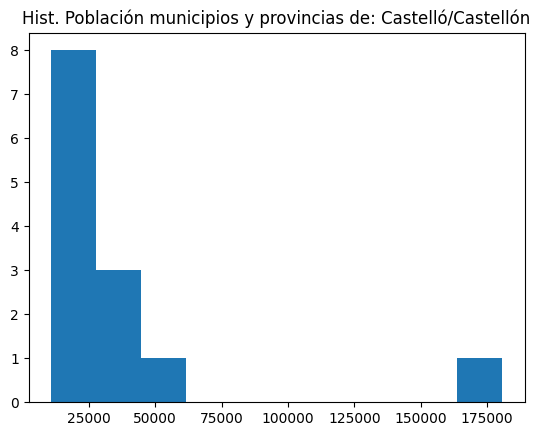

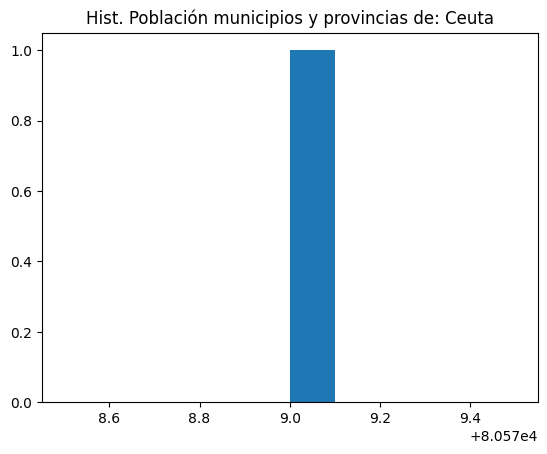

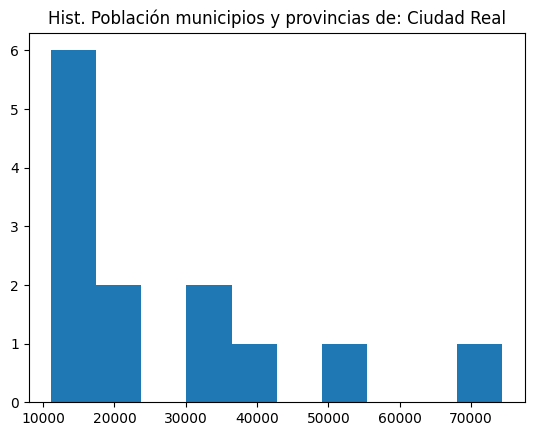

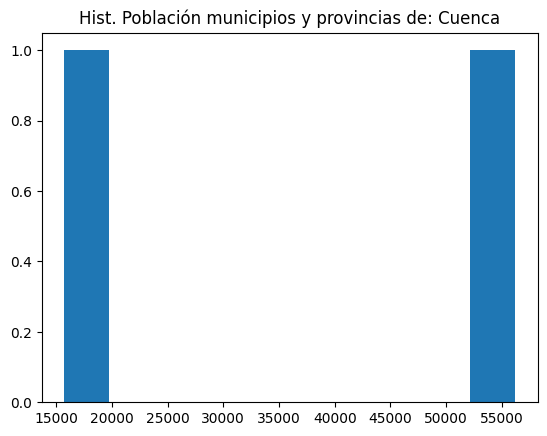

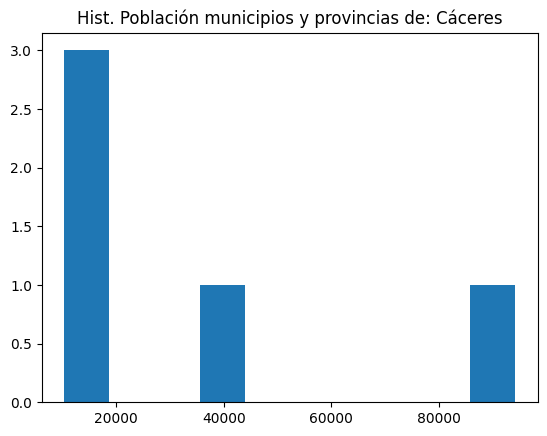

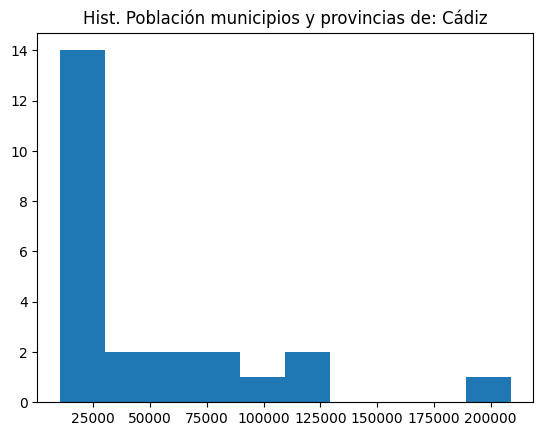

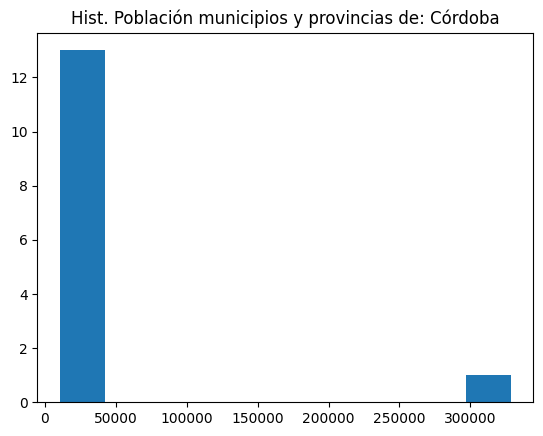

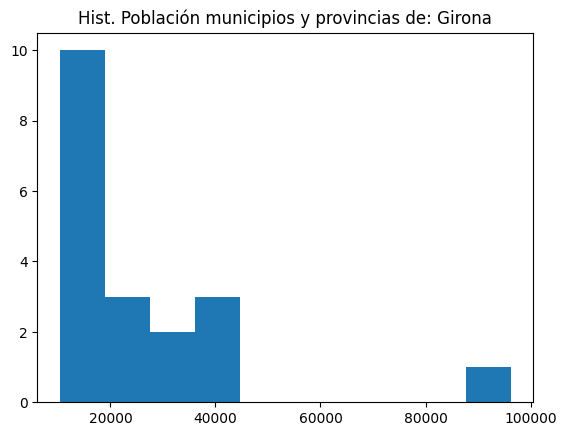

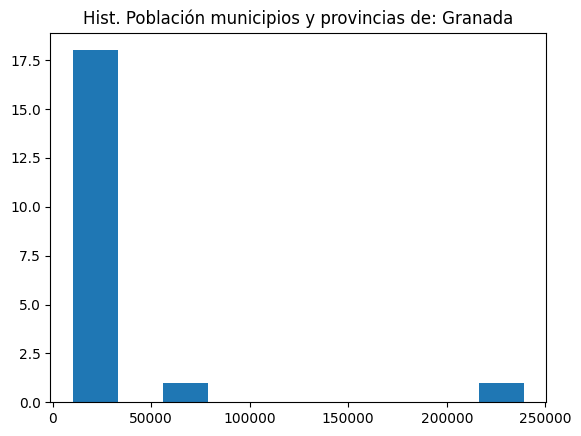

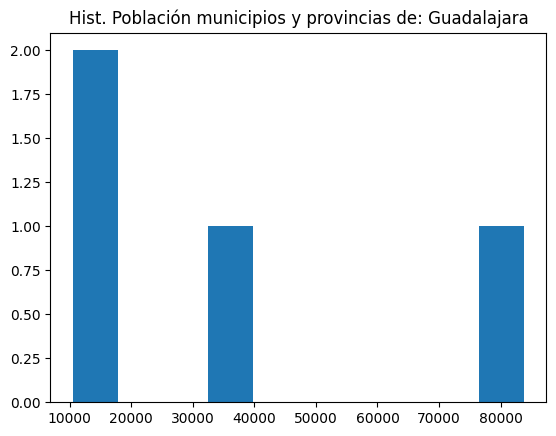

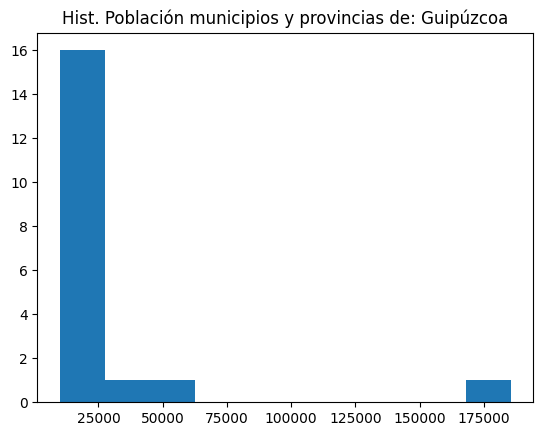

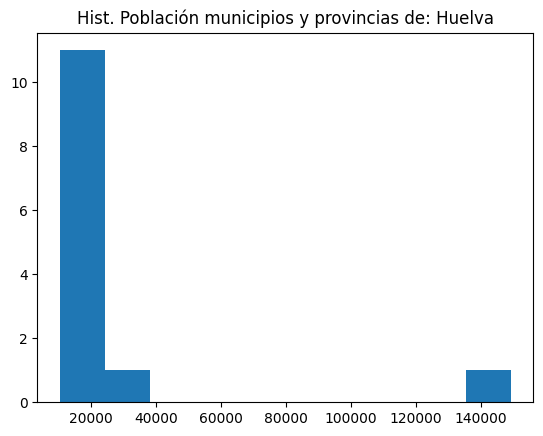

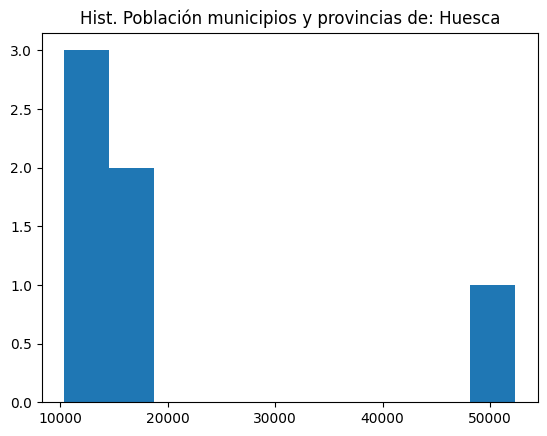

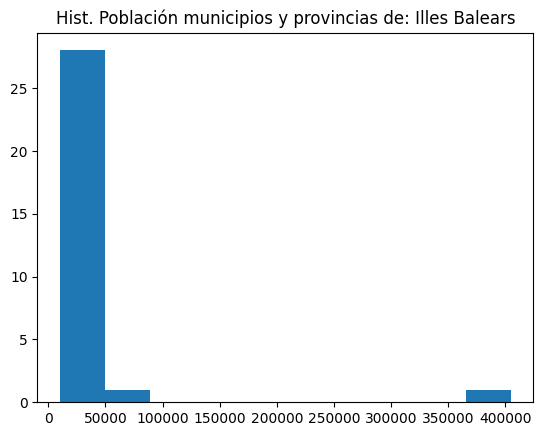

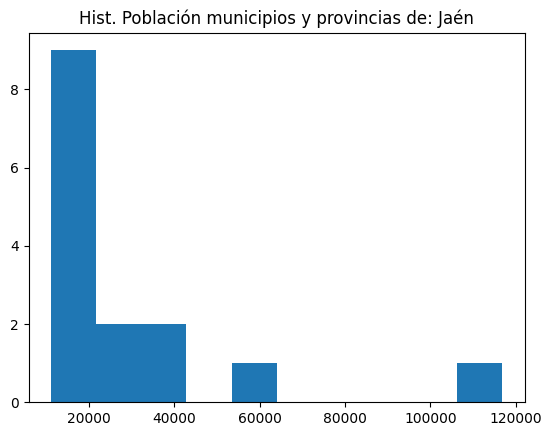

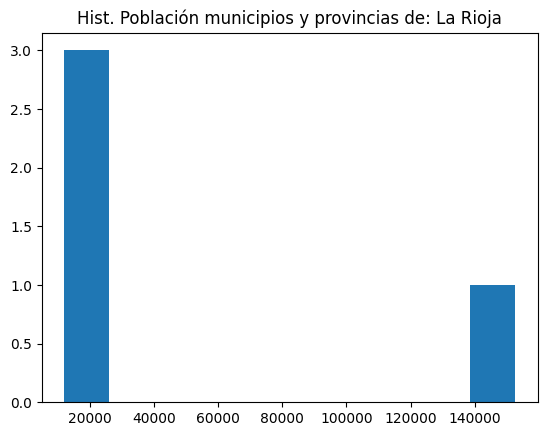

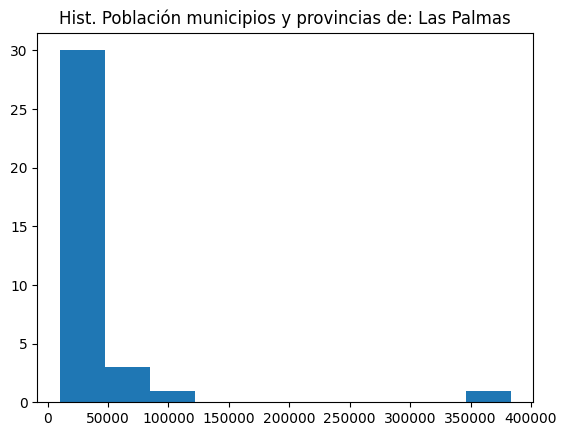

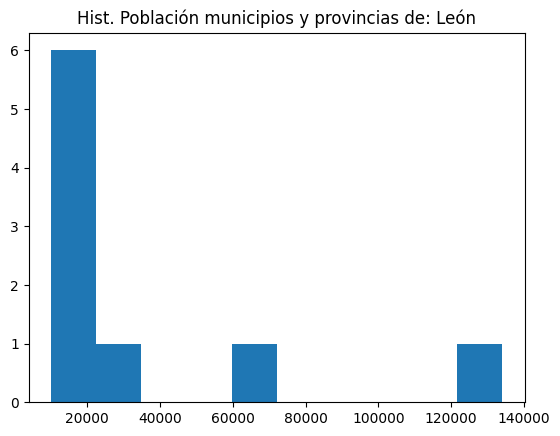

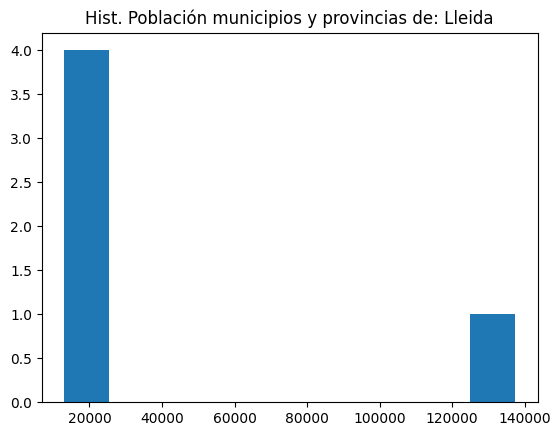

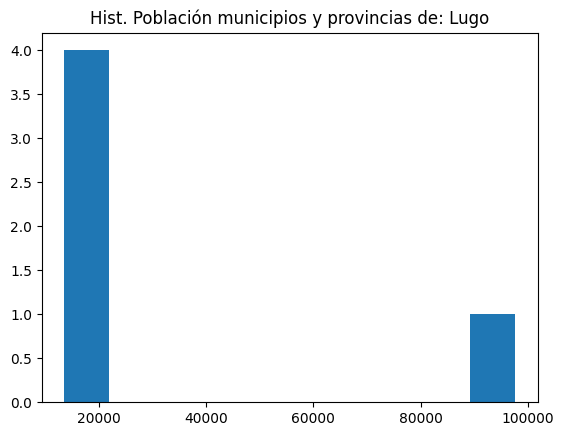

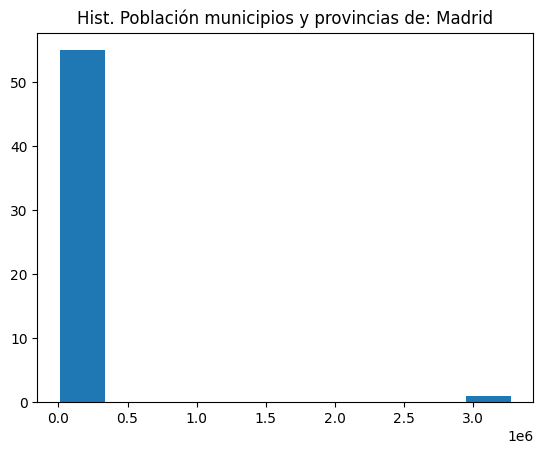

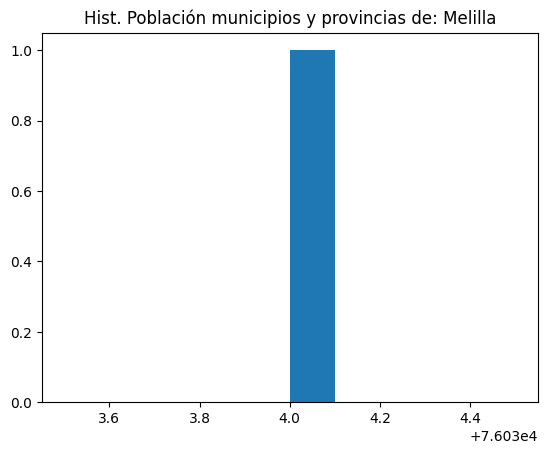

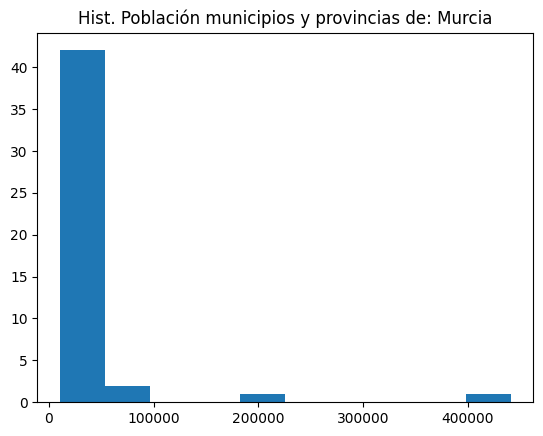

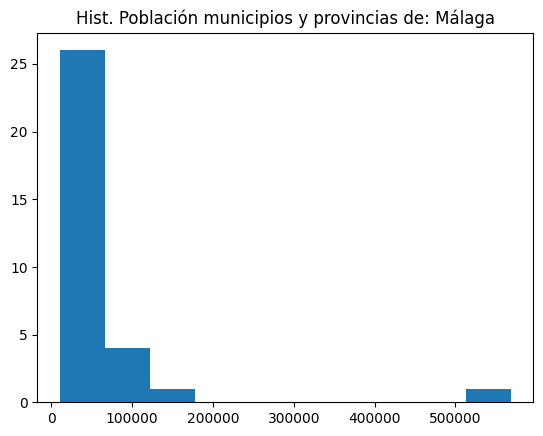

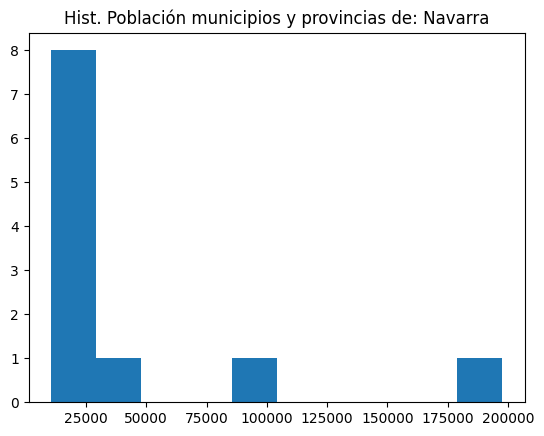

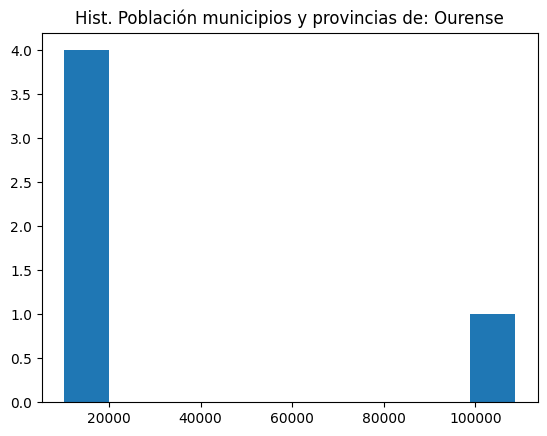

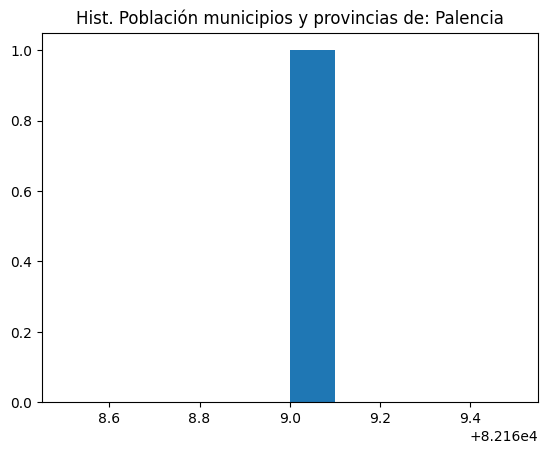

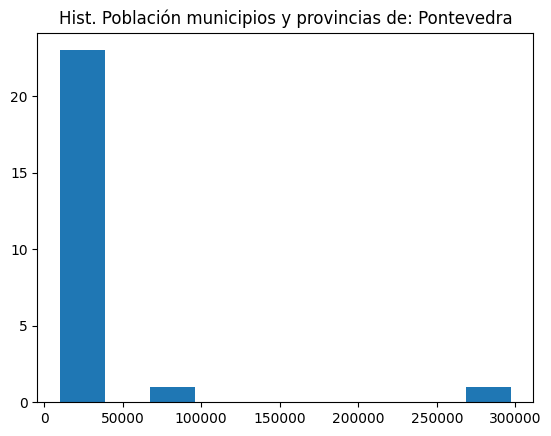

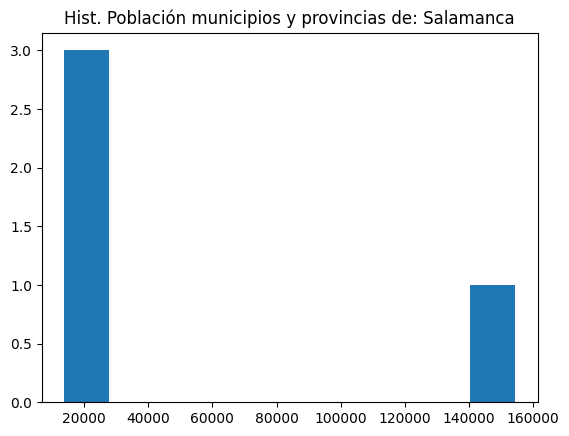

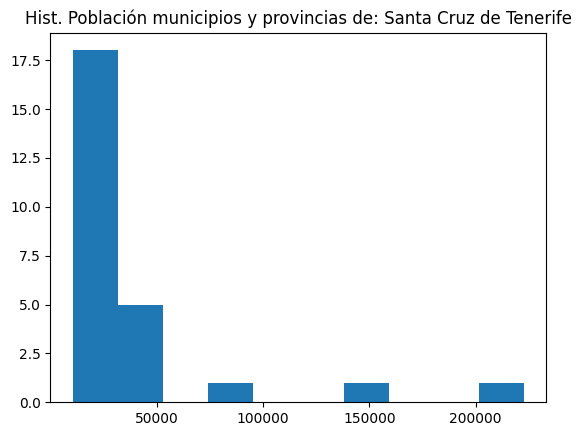

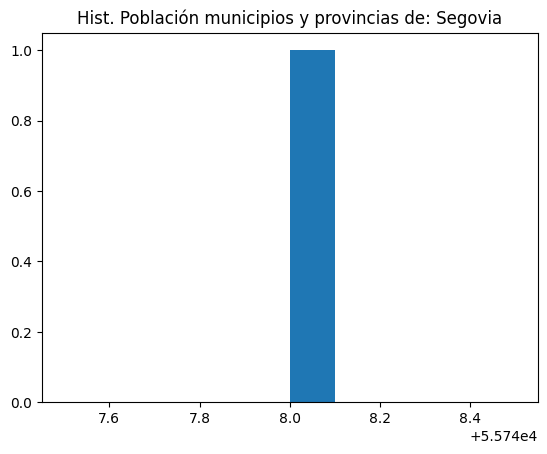

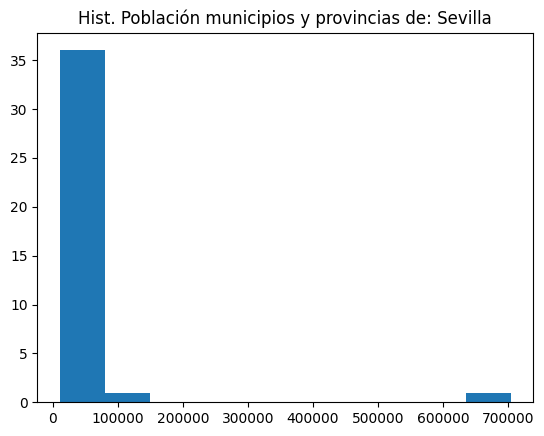

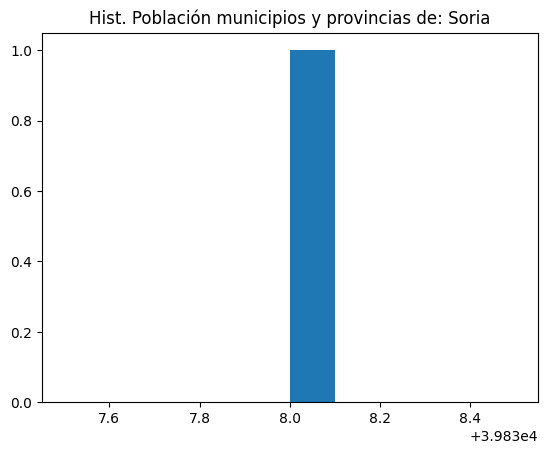

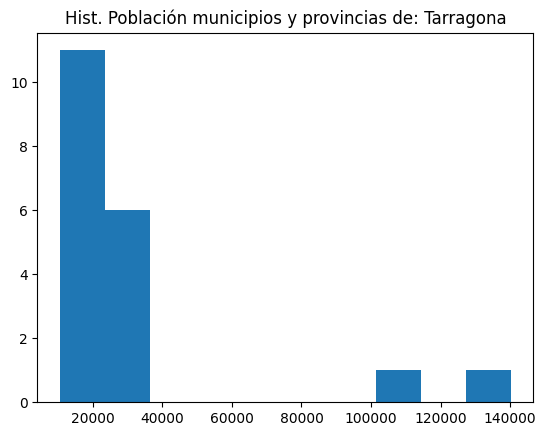

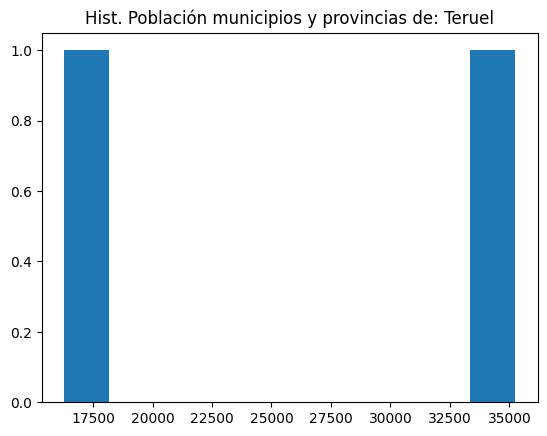

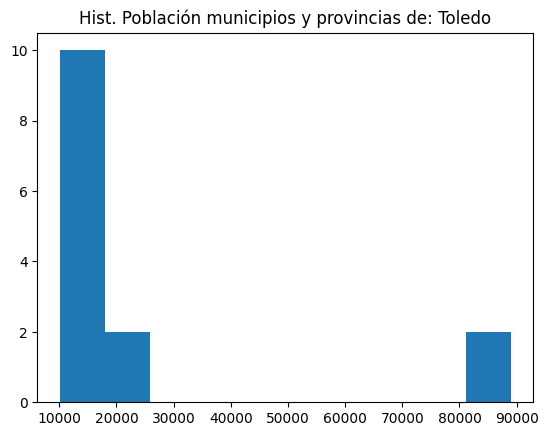

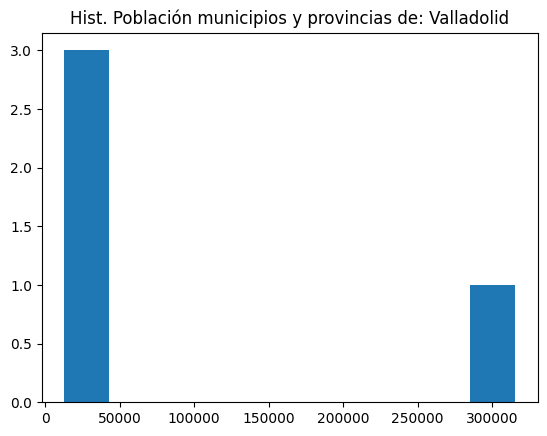

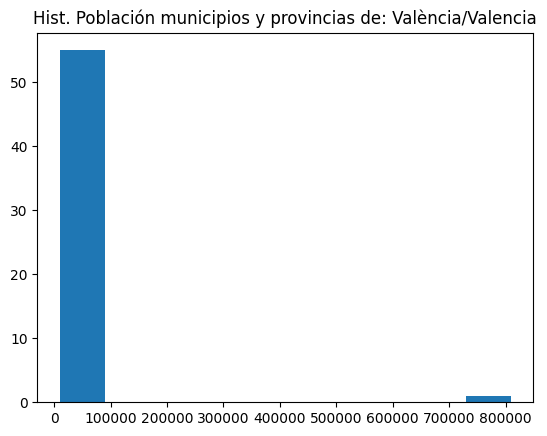

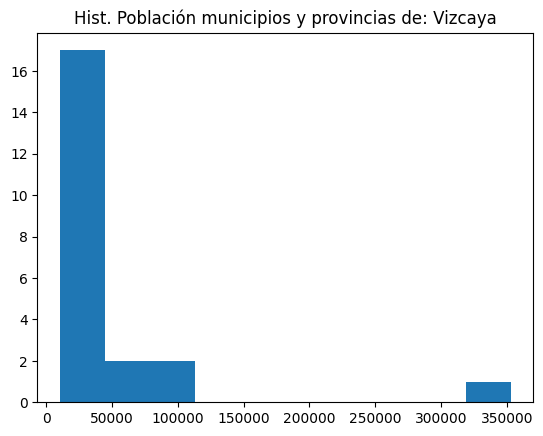

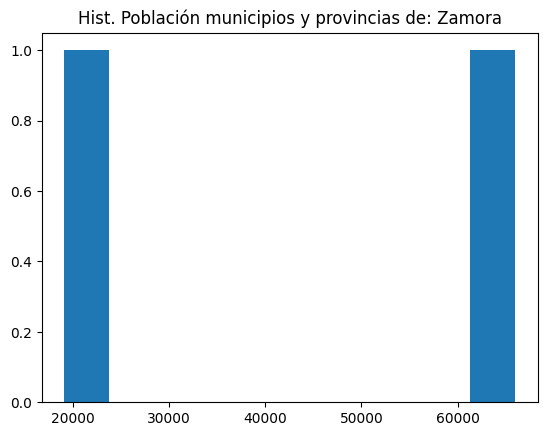

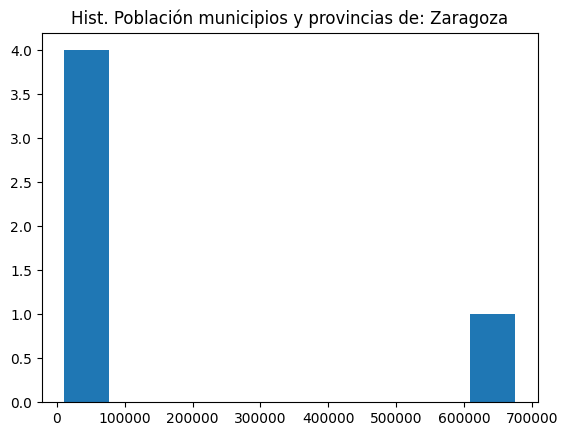

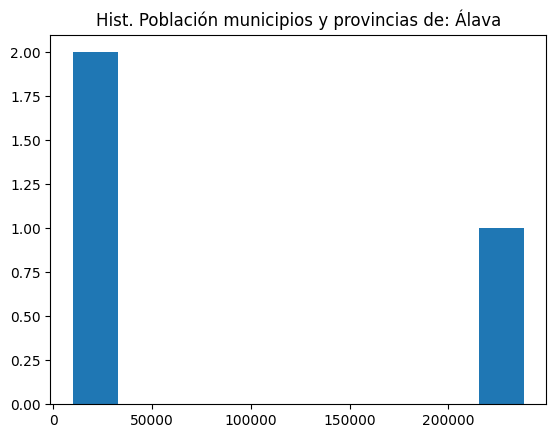

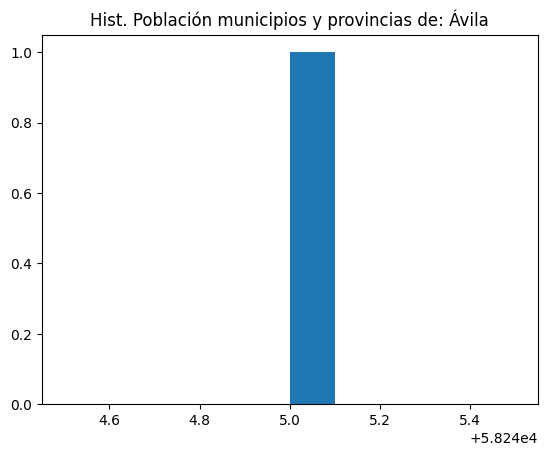

In [26]:
pobla= df.groupby("Provincia")
for provincia, datos in pobla:
    poblacion = datos['Poblacion']
    plt.hist(poblacion)
    plt.title('Hist. Población municipios y provincias de: '+provincia)
#plt.xlim(0,100000)
    plt.show()

7) Seleccione al azar cincuenta municipios diferentes de
entre los diponibles en el archivo. Asegúrese de que no
se repitan. ¿Luego calcule el promedio de la población y
la desviación estándar de esto 50 municipios?.

In [79]:
df_mun = df.groupby(by=['Municipio'], sort=False, as_index=False).aggregate({'Poblacion': 'sum'}).sample(n=50, replace=False)
mun_prom=df_mun['Poblacion'].mean()
mun_std = df_mun['Poblacion'].std()

#print(df_mun)
print(f"El promedio de la población de la muestra de estos municipios es: {mun_prom}")
print(f"La desviación estándard de la población de la muestra de stos municipios es: {mun_std}")

El promedio de la población de la muestra de estos municipios es: 50637.12
La desviación estándard de la población de la muestra de stos municipios es: 99421.84019059024


8) Dígame los nombres de los Municipios más cercano y más
lejano a Madrid. Para ello debe calcular la distancia en
todos ellos y Madrid. No considere a Madrid en el
análisis ya que la distancia sería cero.

Se toma en cuenta el punto de origen Madrid como (0,0)

In [73]:
import math as mt
#Coordenadas de Madrid
mad_x = 0
mad_y = 0
#Se extraen las distancias máximas y mínimas por Municicpio
df_dist_mad = df.groupby(by=['Municipio'], sort=False, as_index=False).aggregate({'X': 'max','Y':'max'})
#Se excluye Madrid
df_dist_mad = df_dist_mad[df_dist_mad['Municipio']!='Madrid']
#Se establecen las distancias con respecto a Madrid
distancias=[]
for i , muni in df_dist_mad.iterrows():
    x = muni['X']
    y = muni['Y']
    dist = mt.sqrt((x-mad_x)**2 + (y-mad_y)**2)
    distancias.append(dist)

#Se agregan las distancias al DataFrame
df_dist_mad["DistanciasMad"]= distancias
#Se ordenan los municipios de mayor a menor distancia
df_dist_mad= df_dist_mad.sort_values(by=['DistanciasMad'], ascending=False)
dist_max=df_dist_mad.loc[df_dist_mad['DistanciasMad'].idxmax()]['DistanciasMad']
dist_min=df_dist_mad.loc[df_dist_mad['DistanciasMad'].idxmin()]['DistanciasMad']
mun_max = df_dist_mad.loc[df_dist_mad['DistanciasMad'].idxmax()]['Municipio'] 
mun_min = df_dist_mad.loc[df_dist_mad['DistanciasMad'].idxmin()]['Municipio'] 

print(f'El municipio más lejano es: {mun_max} a {dist_max}')
print(f'El municipio más cercano es: {mun_min} a {dist_min}')
print('-------------')
print("El municipio más lejano es:")
print(df_dist_mad[['Municipio','DistanciasMad']].head(n=1))
print("")
print("El municipio más cercano es:")
print(df_dist_mad[['Municipio','DistanciasMad']].tail(n=1))

El municipio más lejano es: Viveiro a 44.28070112037296
El municipio más cercano es: Tuineje a 31.616559988583486
-------------
El municipio más lejano es:
    Municipio  DistanciasMad
104   Viveiro      44.280701

El municipio más cercano es:
   Municipio  DistanciasMad
19   Tuineje       31.61656
